In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = "data/NewsSumm_Cleaned.xlsx"
df = pd.read_excel(path, engine='openpyxl')
df.head()

,newspaper_name,published_date,headline,article_text,human_summary,news_category
0,Indian Express,2020-06-01 00:00:00,Virus may be invisible enemy but COVID warrior...,Prime Minister Narendra Modi Monday hailed the...,Prime Minister of India said that the Virus ma...,National News
1,Economic Times,2013-02-11 00:00:00,"Economy can bounce back, says PM Modi","ALLAHABAD: At least 20 persons were killed, an...","In Maha Kumbh, nearly 20 persons were killed. ...",National News
2,Business Standard,2013-02-11 00:00:00,At least 20 killed in stampede in Allahabad,"At least 20 people were killed, and scores of ...",As per the sources 20 people died and scores w...,National News
3,Money Control,2013-02-11 00:00:00,Maha Kumbh: Over 20 dead in Allahabad station ...,More than 20 people were feared dead and 30 ot...,At least 20 people killed and 20 people are in...,National News
4,The Mint,2023-10-02 00:00:00,Gandhian wisdom,"This Gandhi Jayanti, we should reflect upon an...","In this article, the author reflects on Mahatm...",National News


In [9]:
df['newspaper_name'].value_counts()

newspaper_name
The Times of India                                 31534
The Hindu                                          27724
Hindustan Times                                    22318
Indian Express                                     15919
The Economic Times                                 14275
                                                   ...  
The India Timess                                       1
The India  Times                                       1
Hindustan Tines                                        1
Hindustan TIimes                                       1
Farmers unhappy with new land acquisition rates        1
Name: count, Length: 4268, dtype: int64

In [10]:
df['news_category'].value_counts().sum()

np.int64(307821)

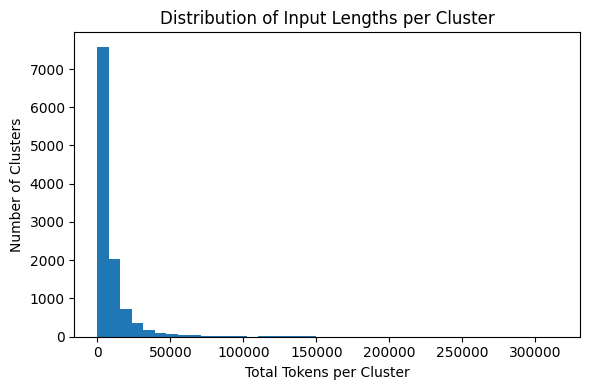

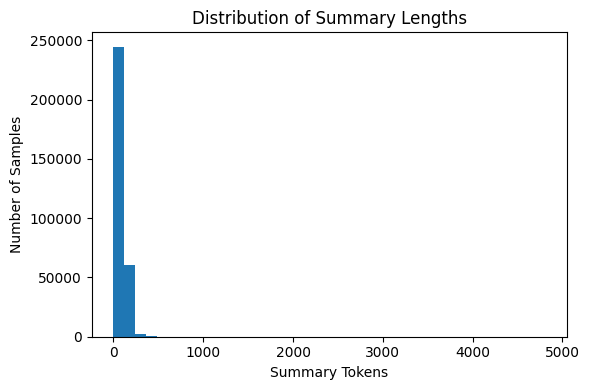

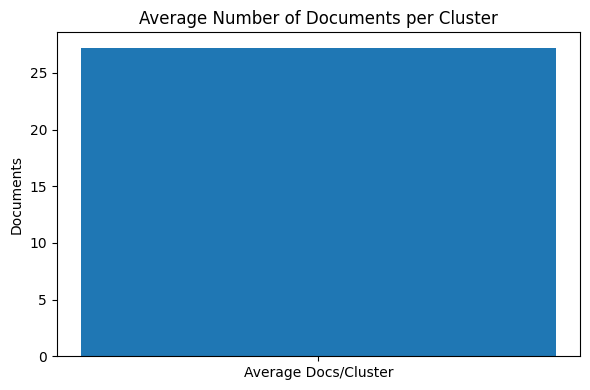

===== Dataset Statistics =====
Clusters: 11307
Avg tokens/cluster: 9073.0
Max tokens/cluster: 314827
Avg summary tokens: 96.0
Avg docs/cluster: 27.22


In [ ]:
import numpy as np

def count_tokens(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

df["cluster_id"] = df["published_date"]  

df["article_tokens"] = df["article_text"].apply(count_tokens)

tokens_per_cluster = (
    df.groupby("cluster_id")["article_tokens"]
      .sum()
)

plt.figure(figsize=(6,4))
plt.hist(tokens_per_cluster, bins=40)
plt.xlabel("Total Tokens per Cluster")
plt.ylabel("Number of Clusters")
plt.title("Distribution of Input Lengths per Cluster")
plt.tight_layout()
plt.savefig("hist_tokens_per_cluster.png", dpi=300)
plt.show()


# Histogram: summary lengths
df["summary_tokens"] = df["human_summary"].apply(count_tokens)

plt.figure(figsize=(6,4))
plt.hist(df["summary_tokens"], bins=40)
plt.xlabel("Summary Tokens")
plt.ylabel("Number of Samples")
plt.title("Distribution of Summary Lengths")
plt.tight_layout()
plt.savefig("hist_summary_lengths.png", dpi=300)
plt.show()


# Bar chart: average docs per cluster
docs_per_cluster = (
    df.groupby("cluster_id")
      .size()
)

avg_docs = docs_per_cluster.mean()

plt.figure(figsize=(6,4))
plt.bar(["Average Docs/Cluster"], [avg_docs])
plt.ylabel("Documents")
plt.title("Average Number of Documents per Cluster")
plt.tight_layout()
plt.savefig("avg_docs_per_cluster.png", dpi=300)
plt.show()


# Print stats for paper text
print("===== Dataset Statistics =====")
print("Clusters:", len(tokens_per_cluster))
print("Avg tokens/cluster:", round(tokens_per_cluster.mean(), 1))
print("Max tokens/cluster:", tokens_per_cluster.max())
print("Avg summary tokens:", round(df["summary_tokens"].mean(), 1))
print("Avg docs/cluster:", round(avg_docs, 2))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

CLUSTER_COL = "cluster_id"


# Fast token counter
def count_tokens(text):
    return len(str(text).split())


# Pre-compute lengths
print("Counting tokens...")

df["article_tokens"] = df["article_text"].astype(str).map(count_tokens)
df["summary_tokens"] = df["human_summary"].astype(str).map(count_tokens)


# Aggregate per cluster
group = df.groupby(CLUSTER_COL)

tokens_per_cluster = group["article_tokens"].sum()
docs_per_cluster   = group.size()
summary_lengths    = df["summary_tokens"]


# Stats (for paper table)
print("\n===== Dataset Statistics =====")
print(f"Clusters: {len(tokens_per_cluster)}")
print(f"Avg tokens/cluster: {tokens_per_cluster.mean():.1f}")
print(f"Max tokens/cluster: {tokens_per_cluster.max():.0f}")
print(f"Avg summary tokens: {summary_lengths.mean():.1f}")
print(f"Avg docs/cluster: {docs_per_cluster.mean():.2f}")


# Plot 1 — Histogram tokens per cluster
plt.figure(figsize=(6,4))
plt.hist(tokens_per_cluster, bins=50)
plt.xlabel("Total Tokens per Cluster")
plt.ylabel("Number of Clusters")
plt.title("Distribution of Input Lengths per Cluster")
plt.tight_layout()
plt.savefig("hist_tokens_per_cluster.png", dpi=300)
plt.close()


# Plot 2 — Histogram summary lengths
plt.figure(figsize=(6,4))
plt.hist(summary_lengths, bins=40)
plt.xlabel("Summary Tokens")
plt.ylabel("Number of Samples")
plt.title("Distribution of Summary Lengths")
plt.tight_layout()
plt.savefig("hist_summary_lengths.png", dpi=300)
plt.close()


# Plot 3 — Avg docs per cluster (bar)
plt.figure(figsize=(4,4))
plt.bar(["Average Docs/Cluster"], [docs_per_cluster.mean()])
plt.ylabel("Documents")
plt.title("Average Number of Documents per Cluster")
plt.tight_layout()
plt.savefig("avg_docs_per_cluster.png", dpi=300)
plt.close()


print("\nSaved:")
print("  hist_tokens_per_cluster.png")
print("  hist_summary_lengths.png")
print("  avg_docs_per_cluster.png")


Counting tokens...

===== Dataset Statistics =====
Clusters: 11307
Avg tokens/cluster: 9073.0
Max tokens/cluster: 314827
Avg summary tokens: 96.0
Avg docs/cluster: 27.22

Saved:
  hist_tokens_per_cluster.png
  hist_summary_lengths.png
  avg_docs_per_cluster.png


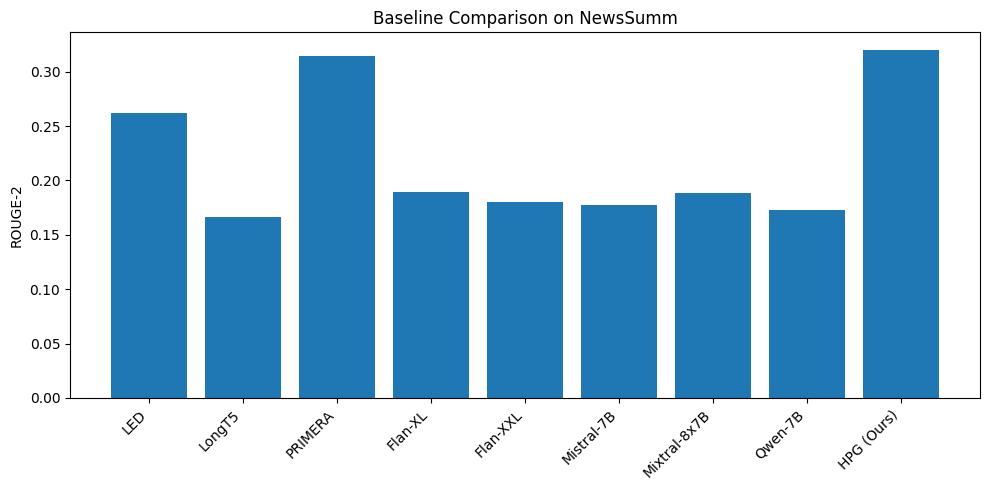

In [15]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "LED",
    "LongT5",
    "PRIMERA",
    "Flan-XL",
    "Flan-XXL",
    "Mistral-7B",
    "Mixtral-8x7B",
    "Qwen-7B",
    "HPG (Ours)"
]

rouge2 = [
    0.2622,
    0.1668,
    0.3144,
    0.1893,
    0.1798,
    0.1779,
    0.1887,
    0.1728,
    0.3202
]

x = np.arange(len(models))

plt.figure(figsize=(10,5))
bars = plt.bar(x, rouge2)

# highlight your model
bars[-1].set_linewidth(3)

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("ROUGE-2")
plt.title("Baseline Comparison on NewsSumm")

plt.tight_layout()
plt.savefig("model_comparison_bar.png", dpi=300)
plt.show()


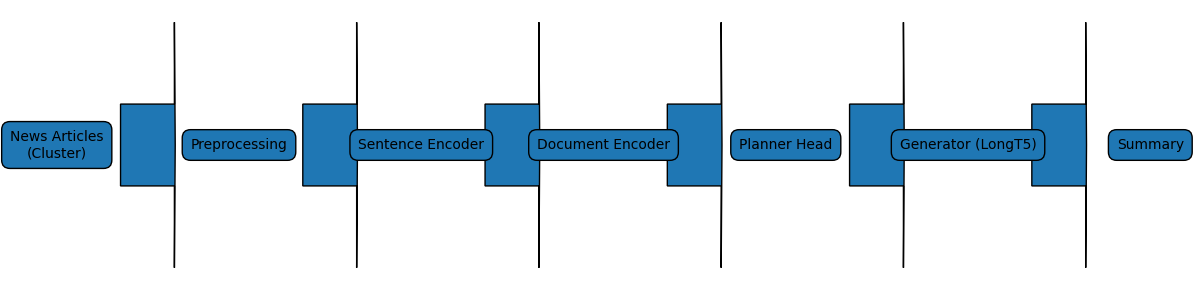

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,3))

def box(x, text):
    ax.text(x, 0.5, text,
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.6"))

steps = [
    "News Articles\n(Cluster)",
    "Preprocessing",
    "Sentence Encoder",
    "Document Encoder",
    "Planner Head",
    "Generator (LongT5)",
    "Summary"
]

xs = range(len(steps))

for i, step in enumerate(steps):
    box(i, step)

for i in range(len(steps)-1):
    ax.arrow(i+0.35, 0.5, 0.3, 0, length_includes_head=True)

ax.axis("off")

plt.tight_layout()
plt.savefig("pipeline_architecture.png", dpi=300)
plt.show()


Average compression ratio: 4.0x


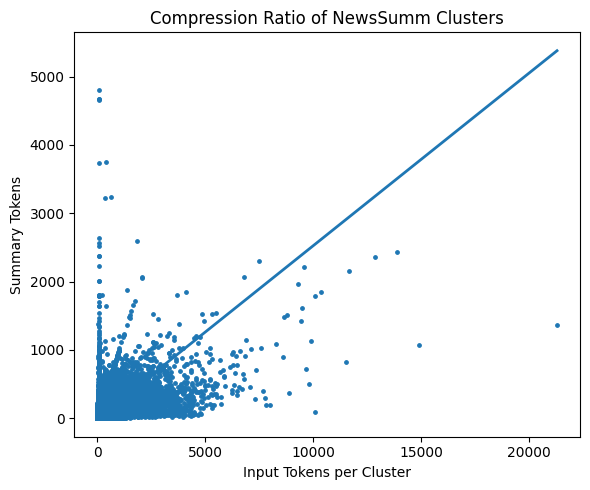

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# TOKEN COUNT
def count_tokens(text):
    return len(str(text).split())

df["article_tokens"] = df["article_text"].apply(count_tokens)
df["summary_tokens"] = df["human_summary"].apply(count_tokens)

# BUILD CLUSTERS
# use date + headline as proxy cluster id
df["cluster_id"] = (
    df["published_date"].astype(str) + "_" + df["headline"].astype(str)
)

cluster_stats = (
    df.groupby("cluster_id")
      .agg(
          input_tokens=("article_tokens", "sum"),
          summary_tokens=("summary_tokens", "sum")
      )
      .reset_index()
)

inputs = cluster_stats["input_tokens"].values
summaries = cluster_stats["summary_tokens"].values

# COMPUTE RATIO
ratio = inputs / summaries
avg_ratio = ratio.mean()

print(f"Average compression ratio: {avg_ratio:.1f}x")

# PLOT
plt.figure(figsize=(6,5))

plt.scatter(inputs, summaries, s=6)

# average line
x = np.linspace(0, inputs.max(), 100)
y = x / avg_ratio
plt.plot(x, y, linewidth=2)

plt.xlabel("Input Tokens per Cluster")
plt.ylabel("Summary Tokens")
plt.title("Compression Ratio of NewsSumm Clusters")

plt.tight_layout()
plt.savefig("compression_ratio_plot_with_line.png", dpi=300)
plt.show()
